In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import shutil
import yaml
import matplotlib.pyplot as plt 
import torch
import cv2
from glob import glob

In [3]:
yolo_path = '../input/licenseplatetrainedresults/yolov5/runs/train'
latest_run = os.listdir(yolo_path)[-1]

In [4]:
best_weights = os.path.join(yolo_path, latest_run, 'weights', 'best.pt')
model = torch.hub.load('ultralytics/yolov5', 'custom', best_weights)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-7-24 Python-3.7.12 torch-1.11.0+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


<function matplotlib.pyplot.show(close=None, block=None)>

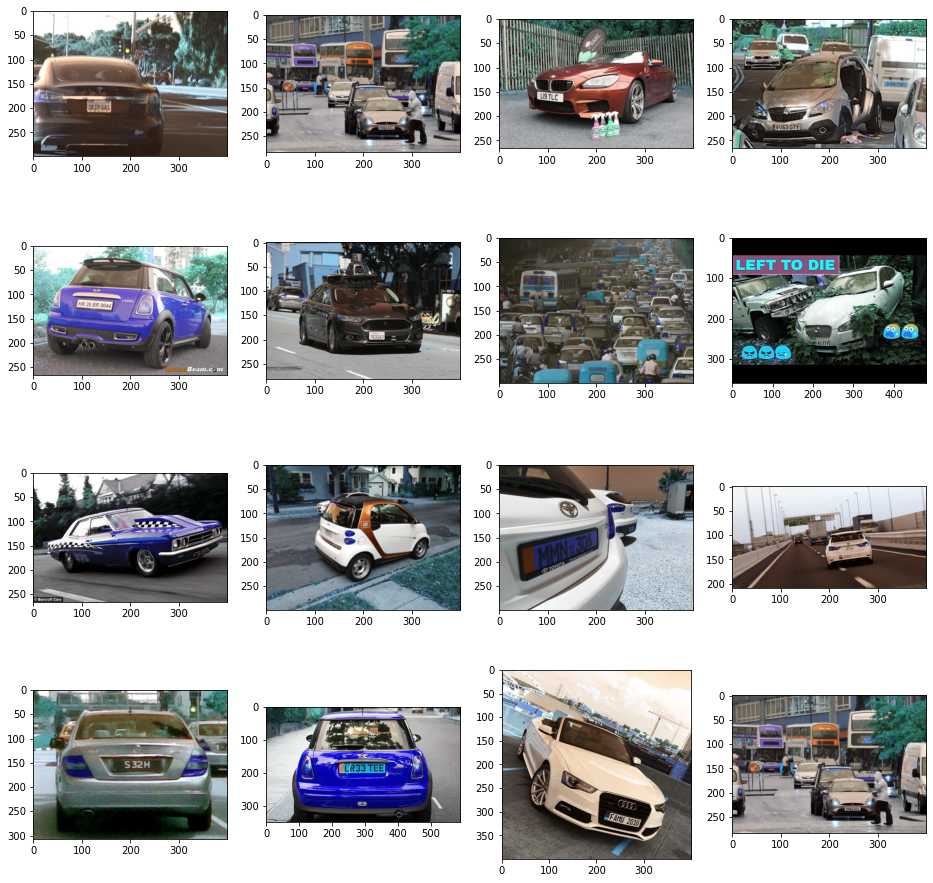

In [5]:
%matplotlib inline
test_images = [file for file in glob('../input/licenseplatetrainedresults/Images/test/*.png')]
test_images = np.random.choice(test_images, size=16).reshape(4,4)

fig, ax = plt.subplots(figsize=(16,16), nrows=4, ncols=4)
for i in range(4):
    for j in range(4):
        image = cv2.imread(test_images[i,j])
        ax[i,j].imshow(image)
plt.show

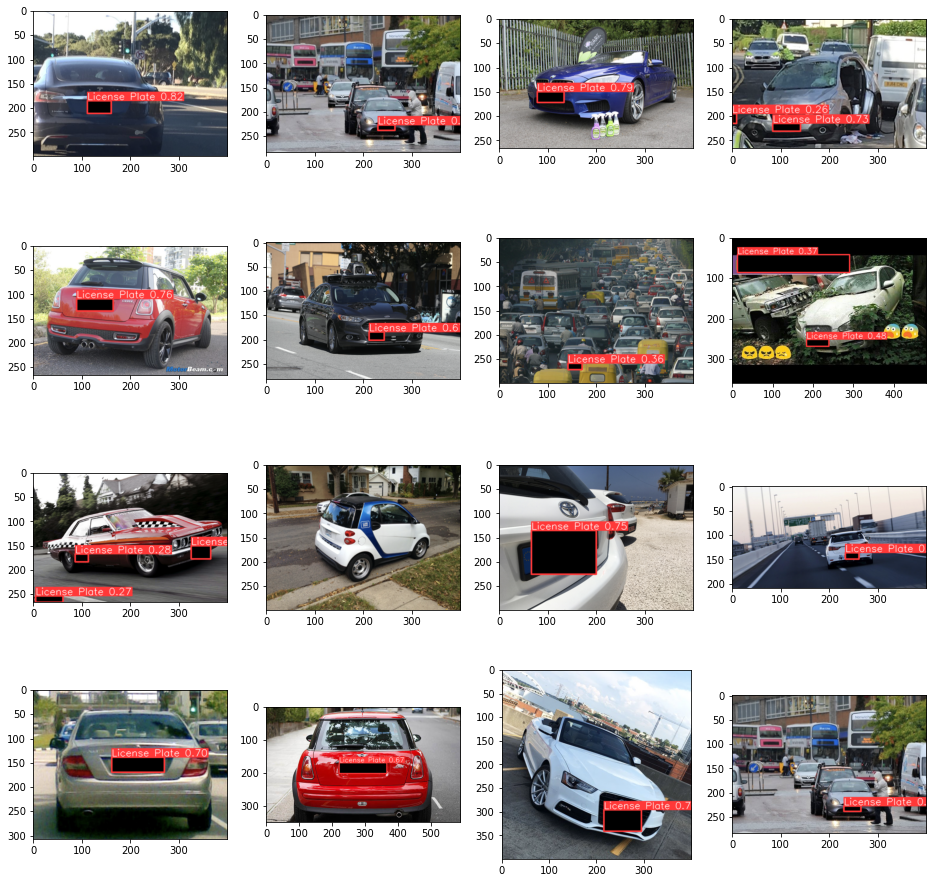

In [6]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(16,16), nrows=4, ncols=4)
for i in range(4):
    for j in range(4):
        image = cv2.imread(test_images[i,j])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = model(image)
        try:
            k,f = 0,0
            while f == 0:
                try:
                    results_df = results.pandas().xyxy[0].loc[k]
                    x_min = int(results_df['xmin'])
                    x_max = int(results_df['xmax'])
                    y_min = int(results_df['ymin'])
                    y_max = int(results_df['ymax'])
                    image = cv2.rectangle(image, (x_min,y_min),(x_max,y_max), color=(0, 0, 0), thickness=-1)
                except KeyError:
                    f=1
                k+=1
            ax[i,j].imshow(np.squeeze(results.render()))
        except KeyError:
            ax[i,j].imshow(np.squeeze(results.render()))
plt.show()